In [119]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns



In [120]:
# Read in the CSV and display the first 5 rows of the DataFrame
df = pd.read_csv('tripadvisor_review.csv')
df.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [121]:
# Display the last 5 rows of the DataFrame
df.tail()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46
979,User 980,0.93,0.56,1.13,0.51,1.34,2.36,3.18,2.87,1.34,2.40


In [122]:
# Rename the columns
df = df.rename(
    columns={
        'Category 1': 'Art Galleries',
        'Category 2': 'Dance Clubs',
        'Category 3': 'Juice Bars',
        'Category 4': 'Restaurants',
        'Category 5': 'Museums',
        'Category 6': 'Resorts',
        'Category 7': 'Parks',
        'Category 8': 'Beaches',
        'Category 9': 'Theaters',
        'Category 10': 'Holy Sites',})
df

,User ID,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Holy Sites
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [123]:
# Show the datatypes and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User ID        980 non-null    object 
 1   Art Galleries  980 non-null    float64
 2   Dance Clubs    980 non-null    float64
 3   Juice Bars     980 non-null    float64
 4   Restaurants    980 non-null    float64
 5   Museums        980 non-null    float64
 6   Resorts        980 non-null    float64
 7   Parks          980 non-null    float64
 8   Beaches        980 non-null    float64
 9   Theaters       980 non-null    float64
 10  Holy Sites     980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [124]:
# Drop the User ID column and display new DataFrame
df_review = df.drop(columns='User ID')
df_review

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Holy Sites
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
975,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [125]:
# Scale the data using the StandardScaler
scaled_data = StandardScaler().fit_transform(df_review)

In [126]:
# Display the scaled data
scaled_data

array([[ 0.11264465,  0.93588703,  1.6197497 , ..., -0.32787224,
         0.68751758, -1.18059095],
       [ 0.38808847,  1.77264397,  2.08917107, ..., -1.49205628,
         0.797274  , -1.49190812],
       [ 1.00018585, -1.15600533, -0.60048651, ..., -0.25511074,
        -0.71187679, -0.93153721],
       ...,
       [-0.86671115, -0.06822131, -0.43555468, ..., -0.18234924,
        -0.62955947,  0.68731207],
       [ 0.11264465, -2.41114075, -1.12065614, ...,  1.05459631,
        -1.23321978, -1.05606408],
       [ 0.11264465, -1.6580595 ,  0.14805027, ...,  0.25421978,
        -0.62955947, -1.24285439]])

In [127]:
# Create a new DataFrame with the scaled data and display the new DataFrame
df_scaled_data = pd.DataFrame(scaled_data, columns=df_review.columns)
df_scaled_data

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Holy Sites
0,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591
1,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908
2,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537
3,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205
4,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010
...,...,...,...,...,...,...,...,...,...,...
975,-0.468848,-0.486600,-0.904976,-0.008942,-0.136628,-0.858390,-1.398739,-0.400634,-1.589928,1.247683
976,1.092000,-0.904978,0.135363,-0.545444,-0.365353,-0.302075,-0.120041,-0.327872,-0.629559,0.002414
977,-0.866711,-0.068221,-0.435555,-0.366610,0.824016,-0.116637,-1.398739,-0.182349,-0.629559,0.687312
978,0.112645,-2.411141,-1.120656,-0.366610,-1.463232,-2.675687,-0.120041,1.054596,-1.233220,-1.056064


In [128]:
# Add the User ID column back to the scaled data DataFrame
df_scaled_data['User ID'] = df['User ID']
df_scaled_data.head()

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Holy Sites,User ID
0,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591,User 1
1,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908,User 2
2,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537,User 3
3,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205,User 4
4,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010,User 5


In [129]:
# Set the User ID column as the index
df_scaled_data = df_scaled_data.set_index('User ID')
df_scaled_data

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Holy Sites
User ID,,,,,,,,,,
User 1,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591
User 2,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908
User 3,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537
User 4,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205
User 5,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010
...,...,...,...,...,...,...,...,...,...,...
User 976,-0.468848,-0.486600,-0.904976,-0.008942,-0.136628,-0.858390,-1.398739,-0.400634,-1.589928,1.247683
User 977,1.092000,-0.904978,0.135363,-0.545444,-0.365353,-0.302075,-0.120041,-0.327872,-0.629559,0.002414
User 978,-0.866711,-0.068221,-0.435555,-0.366610,0.824016,-0.116637,-1.398739,-0.182349,-0.629559,0.687312


In [130]:
# Create an empty list for inertia and define k to represent a range of clusters from 1 to 14
inertia = []
k = list(range(1,15))

In [131]:
# Loop through each i value for k
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

c:\Users\selle\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\selle\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\selle\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\selle\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

In [132]:
# Create and display a DataFrame representing the inertia for each cluster
elbow_data = {'k':k,
              'inertia':inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,9800.000000
1,2,7770.043196
2,3,7129.284126
3,4,6703.269768
4,5,6300.349265
5,6,5714.972928
6,7,5381.930580
7,8,5062.348551
8,9,4918.582692
9,10,4835.183478


<Axes: xlabel='k'>

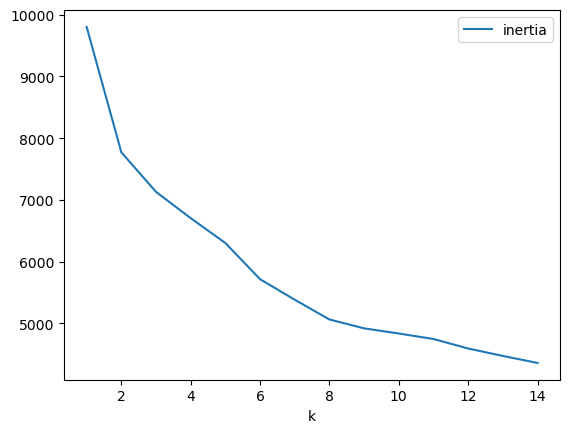

In [133]:
# Plot the elbow curve
plot = df_elbow.plot.line(x='k', y='inertia')
plot

In [134]:
# Perform K-Means clustering with 2 clusters
model = KMeans(n_clusters=2, n_init='auto', random_state=1)
model.fit(scaled_data)

# Predict cluster assignments
predicted_2 = model.predict(scaled_data)

# Print the predicted cluster labels
print(predicted_2)

[1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1
 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1
 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0
 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0
 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0
 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1
 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0
 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0
 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 

c:\Users\selle\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [135]:
# Make a copy of the scaled DataFrame
predicted_2_df = df_scaled_data.copy()
predicted_2_df

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Holy Sites
User ID,,,,,,,,,,
User 1,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591
User 2,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908
User 3,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537
User 4,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205
User 5,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010
...,...,...,...,...,...,...,...,...,...,...
User 976,-0.468848,-0.486600,-0.904976,-0.008942,-0.136628,-0.858390,-1.398739,-0.400634,-1.589928,1.247683
User 977,1.092000,-0.904978,0.135363,-0.545444,-0.365353,-0.302075,-0.120041,-0.327872,-0.629559,0.002414
User 978,-0.866711,-0.068221,-0.435555,-0.366610,0.824016,-0.116637,-1.398739,-0.182349,-0.629559,0.687312


In [136]:
# Add cluster labels from 2-cluster K-means
predicted_2_df['cluster_2'] = predicted_2
predicted_2_df

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Holy Sites,cluster_2
User ID,,,,,,,,,,,
User 1,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591,1
User 2,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908,1
User 3,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537,0
User 4,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205,0
User 5,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010,1
...,...,...,...,...,...,...,...,...,...,...,...
User 976,-0.468848,-0.486600,-0.904976,-0.008942,-0.136628,-0.858390,-1.398739,-0.400634,-1.589928,1.247683,0
User 977,1.092000,-0.904978,0.135363,-0.545444,-0.365353,-0.302075,-0.120041,-0.327872,-0.629559,0.002414,0
User 978,-0.866711,-0.068221,-0.435555,-0.366610,0.824016,-0.116637,-1.398739,-0.182349,-0.629559,0.687312,0


<Axes: xlabel='Art Galleries', ylabel='Dance Clubs'>

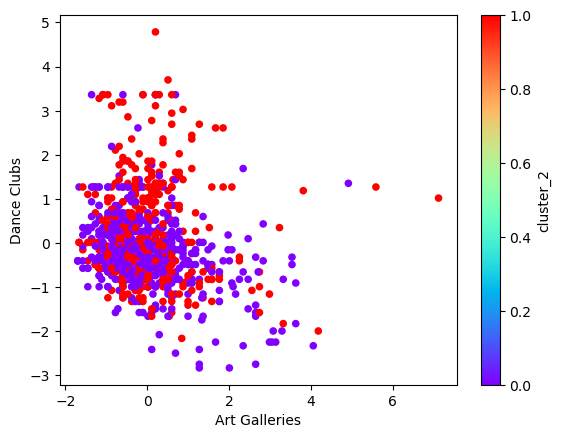

In [137]:
# Scatter plot of Art Galleries vs. Dance Clubs, colored by 2-cluster K-means results
cluster_2_plot_1_2 = predicted_2_df.plot.scatter(x='Art Galleries', y='Dance Clubs', c='cluster_2', colormap = 'rainbow')
cluster_2_plot_1_2

<Axes: xlabel='Art Galleries', ylabel='Museums'>

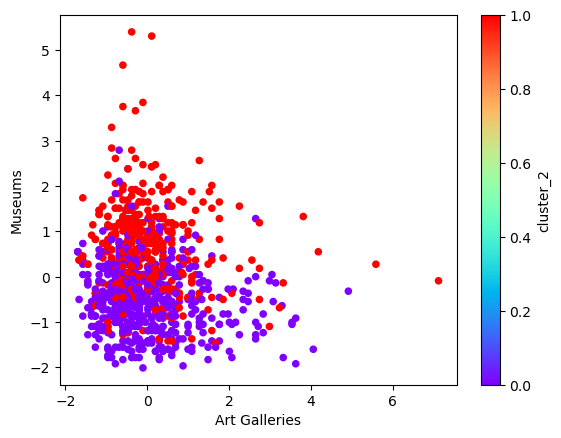

In [138]:
# Scatter plot of Art Galleries vs. Museums, colored by 2-cluster K-means results
cluster_2_plot_1_5 = predicted_2_df.plot.scatter(x='Art Galleries', y='Museums', c='cluster_2', colormap = 'rainbow')
cluster_2_plot_1_5

In [139]:
# Perform K-Means clustering with 5 clusters
model = KMeans(n_clusters=5, n_init='auto', random_state=1)
model.fit(scaled_data)

# Predict cluster assignments
predicted_5 = model.predict(scaled_data)

# Print the predicted cluster labels
print(predicted_5)

[4 4 3 1 3 2 2 2 0 1 0 2 4 4 4 0 3 4 1 4 3 2 2 2 3 4 4 3 2 4 4 4 0 1 1 1 2
 2 4 3 2 2 3 1 1 2 1 3 2 4 2 3 0 3 2 2 4 3 4 0 4 3 2 2 3 3 2 3 3 3 3 4 1 3
 4 0 2 4 2 3 2 1 2 3 3 2 3 2 0 1 2 2 4 4 0 3 4 3 4 1 1 2 0 2 2 4 1 2 3 0 1
 3 0 1 4 1 4 1 3 3 0 1 0 3 3 2 2 3 2 3 3 0 0 1 2 1 4 3 3 2 2 2 2 1 1 2 3 4
 1 0 3 2 2 3 3 2 1 2 0 2 3 2 0 2 3 2 4 1 4 1 1 3 2 2 3 0 1 1 1 1 1 0 3 3 4
 1 3 2 4 2 4 4 2 2 1 2 3 4 2 0 4 1 4 1 3 2 3 1 3 2 2 4 2 2 2 4 2 3 3 3 1 2
 4 2 4 2 0 3 2 4 1 4 2 2 1 1 3 1 3 2 4 0 1 2 2 1 3 0 2 1 3 1 4 4 2 2 2 0 3
 0 3 1 3 1 2 4 4 0 1 0 2 1 4 4 0 2 3 1 2 3 3 1 4 3 2 2 0 1 2 2 4 2 2 1 2 3
 3 3 3 1 2 4 4 1 3 3 1 4 3 4 1 2 3 0 1 3 4 2 4 2 1 1 0 2 1 4 4 0 3 3 1 3 3
 3 2 3 3 2 1 3 0 4 1 4 3 2 1 1 4 4 3 1 4 2 2 2 1 2 1 3 2 0 0 2 1 0 3 1 3 3
 2 4 0 4 1 4 4 2 3 1 2 2 1 2 2 4 0 3 2 2 4 2 1 2 3 4 3 3 2 1 1 4 1 2 4 0 3
 4 0 4 3 0 0 0 1 4 1 2 2 0 4 3 0 1 3 3 0 2 2 2 3 1 0 0 0 2 2 0 1 3 2 2 2 2
 3 2 0 3 3 3 1 3 1 4 3 3 3 3 4 2 1 2 3 1 3 4 2 1 2 2 4 2 2 1 3 4 2 2 4 0 3
 4 2 0 4 3 1 1 2 1 3 2 2 

c:\Users\selle\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [140]:
# Create a copy of the 'df_scaled_data' DataFrame
predicted_5_df = df_scaled_data.copy()
predicted_5_df

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Holy Sites
User ID,,,,,,,,,,
User 1,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591
User 2,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908
User 3,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537
User 4,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205
User 5,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010
...,...,...,...,...,...,...,...,...,...,...
User 976,-0.468848,-0.486600,-0.904976,-0.008942,-0.136628,-0.858390,-1.398739,-0.400634,-1.589928,1.247683
User 977,1.092000,-0.904978,0.135363,-0.545444,-0.365353,-0.302075,-0.120041,-0.327872,-0.629559,0.002414
User 978,-0.866711,-0.068221,-0.435555,-0.366610,0.824016,-0.116637,-1.398739,-0.182349,-0.629559,0.687312


In [141]:
# Add cluster labels from 5-cluster K-means
predicted_5_df['cluster_5'] = predicted_5
predicted_5_df

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Holy Sites,cluster_5
User ID,,,,,,,,,,,
User 1,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591,4
User 2,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908,4
User 3,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537,3
User 4,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205,1
User 5,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010,3
...,...,...,...,...,...,...,...,...,...,...,...
User 976,-0.468848,-0.486600,-0.904976,-0.008942,-0.136628,-0.858390,-1.398739,-0.400634,-1.589928,1.247683,2
User 977,1.092000,-0.904978,0.135363,-0.545444,-0.365353,-0.302075,-0.120041,-0.327872,-0.629559,0.002414,3
User 978,-0.866711,-0.068221,-0.435555,-0.366610,0.824016,-0.116637,-1.398739,-0.182349,-0.629559,0.687312,2


<Axes: xlabel='Art Galleries', ylabel='Dance Clubs'>

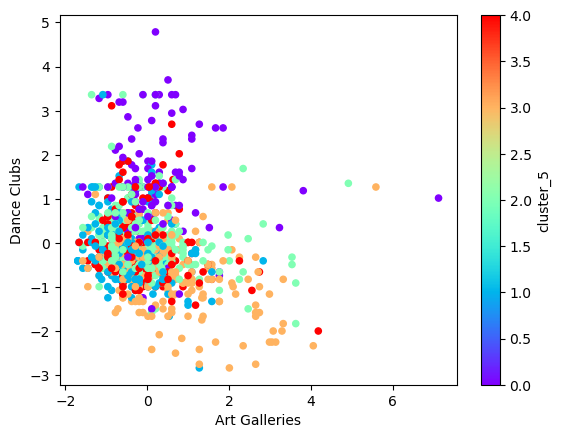

In [142]:
# Scatter plot of Art Galleries vs. Dance Clubs, colored by 5-cluster K-means results
cluster_5_plot_1_2 = predicted_5_df.plot.scatter(x='Art Galleries', y='Dance Clubs', c='cluster_5', colormap = 'rainbow')
cluster_5_plot_1_2

<Axes: xlabel='Art Galleries', ylabel='Juice Bars'>

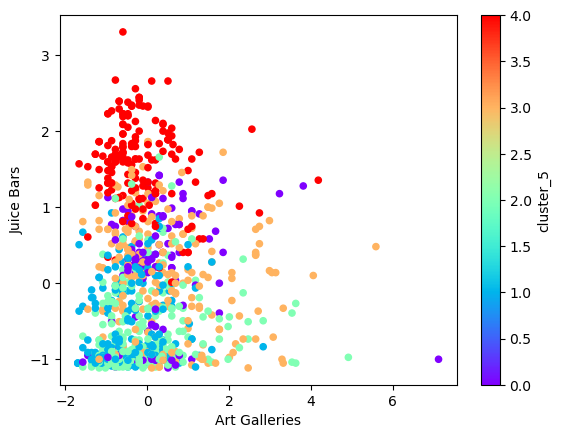

In [143]:
# Scatter plot of Art Galleries vs. Juice Bars, colored by 5-cluster K-means results
cluster_5_plot_1_3 = predicted_5_df.plot.scatter(x='Art Galleries', y='Juice Bars', c='cluster_5', colormap = 'rainbow')
cluster_5_plot_1_3

<Axes: xlabel='Art Galleries', ylabel='Restaurants'>

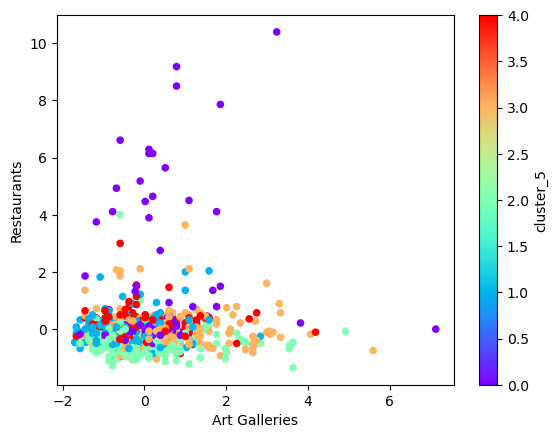

In [144]:
# Scatter plot of Art Galleries vs. Restaurants, colored by 5-cluster K-means results
cluster_5_plot_1_4 = predicted_5_df.plot.scatter(x='Art Galleries', y='Restaurants', c='cluster_5', colormap = 'rainbow')
cluster_5_plot_1_4

In [145]:
#Perform K-Means clustering with 6 clusters
model = KMeans(n_clusters=6, n_init='auto', random_state=1)
model.fit(scaled_data)
predicted_6 = model.predict(scaled_data)
print(predicted_6)

[4 4 3 5 0 2 2 2 0 5 0 2 4 4 4 0 3 4 0 4 0 2 2 2 0 4 4 0 2 4 4 4 0 5 5 5 3
 5 4 3 2 2 3 5 5 2 5 3 3 4 2 3 0 3 2 2 4 3 4 0 4 3 3 5 5 3 3 3 3 3 3 4 5 3
 4 0 2 4 2 3 2 5 1 3 5 2 3 2 1 3 2 3 4 4 0 3 4 3 4 5 5 5 0 3 2 4 5 2 2 0 5
 3 0 5 4 5 4 5 3 3 0 5 0 0 0 3 3 3 2 3 3 0 0 0 2 5 4 0 3 2 2 3 2 5 5 2 0 4
 5 0 5 3 3 3 3 2 5 2 0 3 3 2 0 3 3 3 4 5 4 5 5 3 3 2 3 0 5 5 5 5 5 0 0 3 4
 5 0 2 4 2 4 4 2 2 5 2 3 4 2 1 4 5 4 5 3 3 3 5 3 2 2 4 3 3 2 0 2 3 0 0 5 3
 4 2 4 2 1 3 2 4 5 4 3 3 0 5 0 5 0 2 4 0 5 5 2 3 3 1 2 5 0 5 4 4 3 2 2 1 3
 0 5 5 5 5 2 0 4 0 3 0 2 3 4 4 1 2 0 5 3 5 3 5 4 0 2 3 1 5 2 2 4 2 3 5 2 3
 3 3 4 5 2 4 4 5 0 3 5 4 5 4 5 5 3 0 0 5 4 2 4 2 5 5 0 3 3 0 4 0 0 4 5 0 3
 0 3 0 0 2 0 3 0 4 0 4 3 2 5 5 4 4 3 3 5 2 2 2 5 3 5 3 3 0 0 2 5 0 5 5 3 0
 3 4 1 0 5 4 0 2 3 0 2 2 5 3 2 4 0 3 3 3 0 2 0 3 5 4 3 0 2 5 5 4 5 2 4 0 3
 4 4 4 3 0 4 0 5 4 5 2 2 0 4 3 1 5 0 3 0 2 2 2 5 0 0 0 0 3 2 1 5 3 3 2 3 2
 0 2 0 3 0 0 5 3 5 0 3 0 3 3 4 3 5 2 0 5 3 4 2 5 2 2 4 2 2 5 3 4 3 3 4 0 3
 4 3 0 0 3 5 5 2 5 3 2 2 

c:\Users\selle\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [146]:
#Create a copy of the 'df_scaled_data' DataFrame
predicted_6_df = df_scaled_data.copy()
predicted_6_df

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Holy Sites
User ID,,,,,,,,,,
User 1,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591
User 2,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908
User 3,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537
User 4,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205
User 5,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010
...,...,...,...,...,...,...,...,...,...,...
User 976,-0.468848,-0.486600,-0.904976,-0.008942,-0.136628,-0.858390,-1.398739,-0.400634,-1.589928,1.247683
User 977,1.092000,-0.904978,0.135363,-0.545444,-0.365353,-0.302075,-0.120041,-0.327872,-0.629559,0.002414
User 978,-0.866711,-0.068221,-0.435555,-0.366610,0.824016,-0.116637,-1.398739,-0.182349,-0.629559,0.687312


In [147]:
# Add cluster labels from 6-cluster K-means
predicted_6_df['cluster_6'] = predicted_6
predicted_6_df

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Holy Sites,cluster_6
User ID,,,,,,,,,,,
User 1,0.112645,0.935887,1.619750,0.312960,-0.319608,1.070169,1.158657,-0.327872,0.687518,-1.180591,4
User 2,0.388088,1.772644,2.089171,0.384494,1.098486,2.479500,3.716053,-1.492056,0.797274,-1.491908,4
User 3,1.000186,-1.156005,-0.600487,-0.008942,-1.600466,-0.561689,-0.120041,-0.255111,-0.711877,-0.931537,3
User 4,-1.356389,0.935887,-0.917663,0.134126,-1.097272,-0.598777,-0.120041,0.909073,0.001540,0.189205,5
User 5,-1.172760,-0.319248,0.211486,0.134126,1.372955,0.328415,-0.120041,-0.400634,-1.068585,-0.807010,0
...,...,...,...,...,...,...,...,...,...,...,...
User 976,-0.468848,-0.486600,-0.904976,-0.008942,-0.136628,-0.858390,-1.398739,-0.400634,-1.589928,1.247683,2
User 977,1.092000,-0.904978,0.135363,-0.545444,-0.365353,-0.302075,-0.120041,-0.327872,-0.629559,0.002414,3
User 978,-0.866711,-0.068221,-0.435555,-0.366610,0.824016,-0.116637,-1.398739,-0.182349,-0.629559,0.687312,2


<Axes: xlabel='Art Galleries', ylabel='Dance Clubs'>

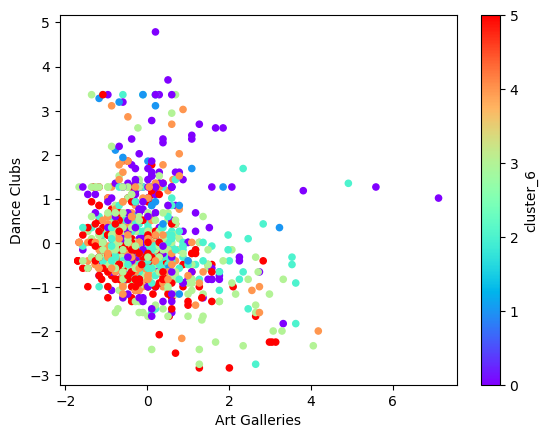

In [148]:
# Scatter plot of Art Galleries vs. Dance Clubs, colored by 6-cluster K-means results
cluster_6_plot = predicted_6_df.plot.scatter(x='Art Galleries', y='Dance Clubs', c='cluster_6', colormap = 'rainbow')
cluster_6_plot

In [149]:
# Perform PCA and display the first 5 rows of transformed data
pca = PCA(n_components=3, random_state=13)
pca_data = pca.fit_transform(scaled_data)
pca_data[:5]


array([[ 2.40757283, -0.07303858,  0.18536018],
       [ 5.31123728, -0.02250014,  0.6548359 ],
       [-0.80783928, -1.7769507 , -0.85066052],
       [-1.06534598,  0.85640099,  0.95865391],
       [ 0.98724627, -0.07677672,  0.73867921]])

In [150]:
# Perform K-Means clustering PCA-transformed data using a random_state of 13
kmeans = KMeans(n_clusters=3, random_state=13)
kmeans.fit(pca_data)
cluster = kmeans.predict(pca_data)

c:\Users\selle\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [151]:
# Create a DataFrame using the PCA-transformed data
pca_data_df = pd.DataFrame(pca_data)

# Add new column named 'cluster' for the assigned cluster 
pca_data_df['cluster'] = cluster

# Display the first 5 rows of the PCA DataFrame
pca_data_df.head()

,0,1,2,cluster
0,2.407573,-0.073039,0.185360,1
1,5.311237,-0.022500,0.654836,1
2,-0.807839,-1.776951,-0.850661,2
3,-1.065346,0.856401,0.958654,0
4,0.987246,-0.076777,0.738679,1


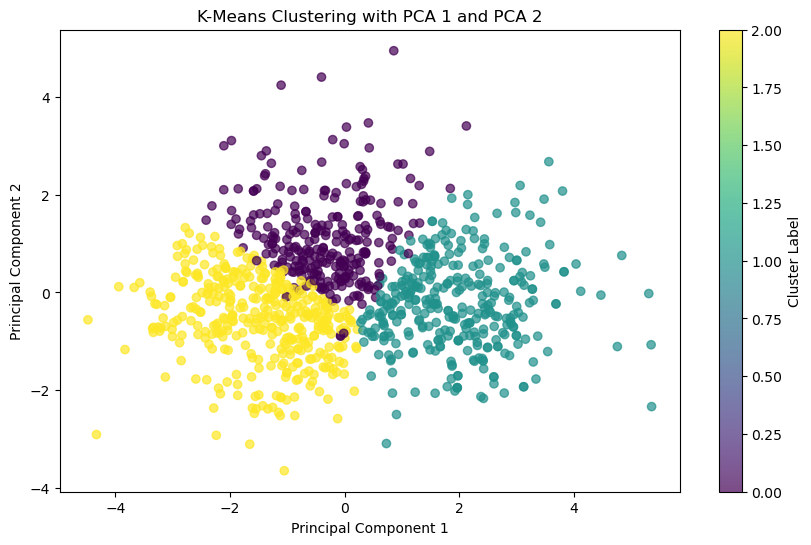

In [152]:
# Create a scatter plot visualizing the K-means clustering results using PCA 1 and PCA 2
plt.figure(figsize=(10, 6))
plt.scatter(pca_data_df[0], pca_data_df[1], c=cluster, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA 1 and PCA 2')
plt.show()

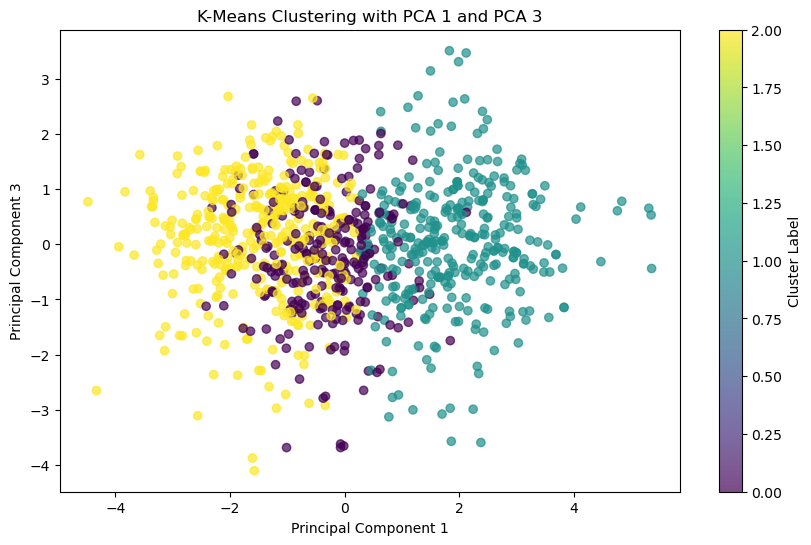

In [153]:
# Create a scatter plot visualizing the K-means clustering results using PCA 1 and PCA 3

plt.figure(figsize=(10, 6))
plt.scatter(pca_data_df[0], pca_data_df[2], c=cluster, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('K-Means Clustering with PCA 1 and PCA 3')
plt.show()

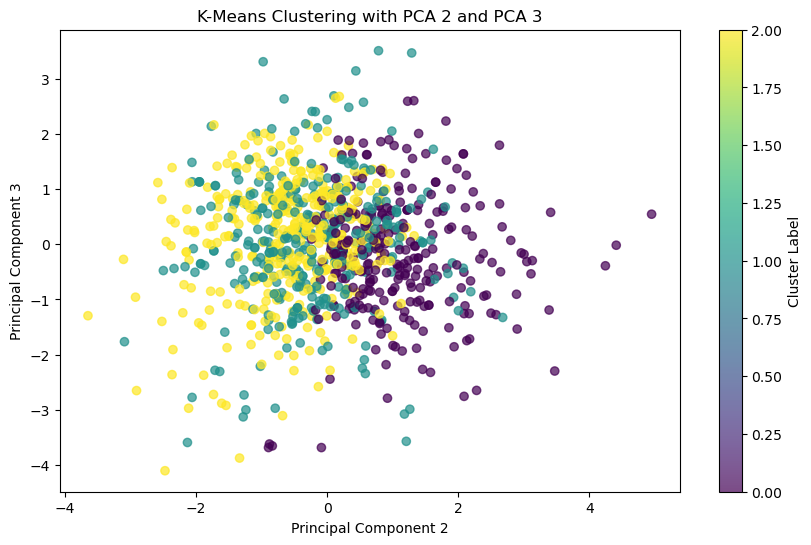

In [154]:
# Create a scatter plot visualizing the K-means clustering results using PCA 2 and PCA 3
plt.figure(figsize=(10, 6))
plt.scatter(pca_data_df[1], pca_data_df[2], c=cluster, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('K-Means Clustering with PCA 2 and PCA 3')
plt.show()

In [155]:
# Create a DataFrame from PCA-transformed data with specified column names
pca_data_df = pd.DataFrame(pca_data, columns=['PCA 1', 'PCA 2', 'PCA 3'])
pca_data_df


,PCA 1,PCA 2,PCA 3
0,2.407573,-0.073039,0.185360
1,5.311237,-0.022500,0.654836
2,-0.807839,-1.776951,-0.850661
3,-1.065346,0.856401,0.958654
4,0.987246,-0.076777,0.738679
...,...,...,...
975,-2.135609,-0.786899,0.808940
976,-0.495717,-1.335973,-0.811851
977,-1.064439,0.458641,0.778467
978,-2.200982,-1.958907,-1.424933


In [156]:
# Display the explained variance ratio for each PCA component
pca.explained_variance_ratio_

array([0.29775044, 0.1262794 , 0.12330993])

In [157]:
# Display the total explained variance ratio of all 3 components
sum(pca.explained_variance_ratio_)

0.5473397667306873

In [158]:
# Display the correlation matrix for the scaled data
df_scaled_data.corr()

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,Holy Sites
Art Galleries,1.000000,-0.187692,0.008613,0.073456,-0.100483,0.094142,-0.012474,0.020029,-0.047313,0.050700
Dance Clubs,-0.187692,1.000000,0.043586,0.131624,0.119631,0.148404,0.110052,-0.158642,0.073342,-0.065762
Juice Bars,0.008613,0.043586,1.000000,0.061128,0.281668,0.356435,0.750651,-0.172953,-0.085435,-0.440543
Restaurants,0.073456,0.131624,0.061128,1.000000,0.101878,0.215866,0.228348,-0.103583,0.026670,-0.352909
Museums,-0.100483,0.119631,0.281668,0.101878,1.000000,0.581306,0.232318,-0.020957,0.041693,-0.247470
Resorts,0.094142,0.148404,0.356435,0.215866,0.581306,1.000000,0.430743,0.000071,0.096410,-0.438104
Parks,-0.012474,0.110052,0.750651,0.228348,0.232318,0.430743,1.000000,-0.072492,0.084965,-0.710731
Beaches,0.020029,-0.158642,-0.172953,-0.103583,-0.020957,0.000071,-0.072492,1.000000,0.169695,0.114701
Theaters,-0.047313,0.073342,-0.085435,0.026670,0.041693,0.096410,0.084965,0.169695,1.000000,-0.045682
Holy Sites,0.050700,-0.065762,-0.440543,-0.352909,-0.247470,-0.438104,-0.710731,0.114701,-0.045682,1.000000


<Axes: >

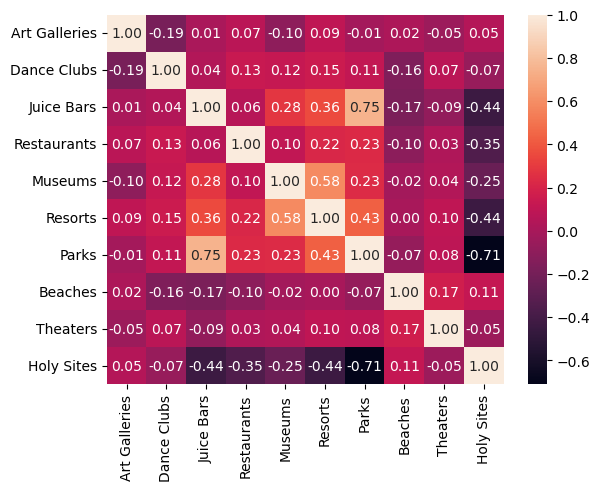

In [159]:
# Visualize a heatmap of the correlation matrix
sns.heatmap(df_scaled_data.corr(), annot=True, fmt=".2f")

In [160]:
# Sort the categories correlated with Parks from least to most correlated
df_scaled_data.corr()['Parks'].sort_values()

Holy Sites      -0.710731
Beaches         -0.072492
Art Galleries   -0.012474
Theaters         0.084965
Dance Clubs      0.110052
Restaurants      0.228348
Museums          0.232318
Resorts          0.430743
Juice Bars       0.750651
Parks            1.000000
Name: Parks, dtype: float64